<a href="https://colab.research.google.com/github/takiwaki/OSCODE/blob/dosss/TimeIntegration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

このファイルを使う（パラメータ等変更）ためにはグーグルアカウントを使ってファイルからドライブにコピーを保存をする。

これは[科学研究部春の学校2023](https://sci.nao.ac.jp/projects/ss2023/index.html)用の資料です。

# 数値積分

超新星などはトランジェント天体（transient）、時間によって光度が変化する。時間による変化を計算するときに、方程式が複雑になると解析的に解くことができなくなる。研究ではよく数値積分を利用して時間発展を記述する。ここでは数値積分の基礎を学習する。



# シミューレーション
単純な円運動を記述してみる。周波数を$\omega$とする。

\begin{align}
\dot{x} &= -\omega y \\
\dot{y} &= \omega x 
\end{align}

これをいくつかの手法で解いてみる。数値解法では時間方向のグリッドを張る。
$n+1$ステップの位置を見積もるためには以下の式を評価する。右辺の評価の仕方にいろいろなやり方がある。
\begin{align}
\frac{x_{n+1} - x_{n}}{\Delta t}&=  -\omega y\\
\frac{y_{n+1} - y_{n}}{\Delta t}&=  \omega x 
\end{align}

以下、いくつかの手法を説明する。**プログラムと式を見比べること。**

## Euler法
$n$ステップ目の変数を用いて一回の直接計算で$\Delta t$分あとの$n+1$ステップ目の量を得る。例えば$x,y<1$の場合を考えると$\omega \Delta t>1$では明らかにダメなことがわかる。$\omega \Delta t\ll1$である必要がある。この条件はわりと大丈夫です。

\begin{align}
\left(
\begin{array}{c}
x_{n+1}  \\
y_{n+1} 
\end{array}
\right)=
\left(
\begin{array}{c}
x_{n} -\omega y_n \Delta t \\
y_{n} +\omega x_n \Delta t
\end{array}
\right)
\end{align}

## backward Euler法

$n+1$ステップ目の変数を用いて一回の直接計算で$\Delta t$分あとの$n+1$ステップ目の量を得る。
\begin{align}
\left(
\begin{array}{c}
x_{n+1}\\
y_{n+1}
\end{array}
\right)=
\left(
\begin{array}{c}
x_{n} -\omega y_{n+1} \Delta t\\
y_{n} +\omega x_{n+1} \Delta t
\end{array}
\right)
\end{align}
これは以下のように整理できる。
$$
\left(
\begin{array}{cc}
1 && \omega \Delta t\\
-\omega \Delta t &&1 \\
\end{array}
\right)
\left(
\begin{array}{c}
x_{n+1}\\
y_{n+1} 
\end{array}
\right)=
\left(
\begin{array}{c}
x_{n}\\
y_{n} 
\end{array}
\right)
$$
これの逆行列を求めれば良い。
$$
\left(
\begin{array}{c}
x_{n+1}\\
y_{n+1} 
\end{array}
\right)=
\left(
\begin{array}{cc}
1 && \omega \Delta t\\
-\omega \Delta t &&1 \\
\end{array}
\right)^{-1}
\left(
\begin{array}{c}
x_{n}\\
y_{n} 
\end{array}
\right)
$$

## Crank-Nicolson法
Crank-Nicolson法はEuler法とbackward Euler法を足して2で割る手法である。\begin{align}
\left(
\begin{array}{c}
x_{2^*}\\
y_{2^*} 
\end{array}
\right)&=
\left(
\begin{array}{c}
x_{n} -\omega \Delta t\frac{y_{1^*}+y_{2^*}}{2} \\
y_{n} +\omega\Delta t\frac{x_{1^*}+x_{2^*}}{2} 
\end{array}
\right)
\end{align}

右辺は以下のように求める。

\begin{align}
\left(
\begin{array}{c}
x_{1^*}\\
y_{1^*} 
\end{array}
\right)&=
\left(
\begin{array}{c}
x_{n}\\
y_{n} 
\end{array}
\right)\\
\left(
\begin{array}{c}
x_{2^*}\\
y_{2^*} 
\end{array}
\right)&=
\left(
\begin{array}{cc}
1 && \omega \Delta t\\
-\omega \Delta t &&1 \\
\end{array}
\right)^{-1}
\left(
\begin{array}{c}
x_{n}\\
y_{n} 
\end{array}
\right)
\end{align}

この手法は下記のプログラムには含まれていない。**時間のある方は自分で実装してみること。**

## Runge-Kutta法
数値積分では非線形の問題を$\Delta t$の一次の関数として近似し、それを何度も繰り返して正しい答えを得ようとする。この時Taylor展開から一回の積分の誤差は$\Delta t^2$に比例する。この誤差をより小さく（高次に）抑えたい場合、いくつかやり方がある。最も代表的なのはRunge-Kutta法であり、4次の公式が有名である。この場合誤差は$\Delta t^5$に比例する。この精度で十分なことが多い。また逆行列を用いないので複雑な式にも容易に実装できる。

\begin{align}
x_{n+1} &= x_{n} -\omega \Delta t\frac{y_{1^*}+
2 y_{2^*}+2y_{3^*}+y_{4^*}}{6}\\
y_{n+1} &= y_{n} +\omega \Delta t\frac{x_{1^*}+
2 x_{2^*}+2x_{3^*}+x_{4^*}}{6}
\end{align}
ここで中間地点の$1^*, 2*, 3^*,4^*$は以下のように計算される。

\begin{align}
\left(
\begin{array}{c}
x_{1^*}\\
y_{1^*} 
\end{array}
\right)&=
\left(
\begin{array}{c}
x_{n}\\
y_{n} 
\end{array}
\right)\\
\left(
\begin{array}{c}
x_{2^*}\\
y_{2^*} 
\end{array}
\right)&=
\left(
\begin{array}{c}
x_{n} -\omega y_{1^*} \Delta t/2\\
y_{n} +\omega x_{1^*} \Delta t/2
\end{array}
\right)\\
\left(
\begin{array}{c}
x_{3^*}\\
y_{3^*} 
\end{array}
\right)&=
\left(
\begin{array}{c}
x_{n} -\omega y_{2^*} \Delta t/2\\
y_{n} +\omega x_{2^*} \Delta t/2
\end{array}
\right)\\
\left(
\begin{array}{c}
x_{4^*}\\
y_{4^*} 
\end{array}
\right)&=
\left(
\begin{array}{c}
x_{n} -\omega y_{3^*} \Delta t\\
y_{n} +\omega x_{3^*} \Delta t
\end{array}
\right)\\
\end{align}





# データ解析

計算したデータを読み込んでプロットしてみよう。Euler方など一次精度の積分は問題があることがわかる。

解析で得られた結果をみて、**なぜこうなるのか自分で考えてみること。絵を書いてみると良い。**講習では省略するが、結果は数学的にも理解できる。[リンク先](http://www-solid.eps.s.u-tokyo.ac.jp/~ataru/edu/ensyu1.pdf)を参照のこと。

ただし、積分精度の問題は振動するときに最も問題になる。他の積分ではそれほど問題にならないこともある。絶対高次精度にしなければいけないわけではない。

またmatplotlibの取り扱いにもなれると良い。**コードのプロットしている部分を1行1行読むこと。**

## gnuplot
データをダウンロードしてgnuplotでもプロットしてみること。gnuplotのほうが操作が簡単である。[gnuplotのサンプルファイル](https://github.com/takiwaki/OSCODE/blob/main/t-x.plt)を参照のこと。

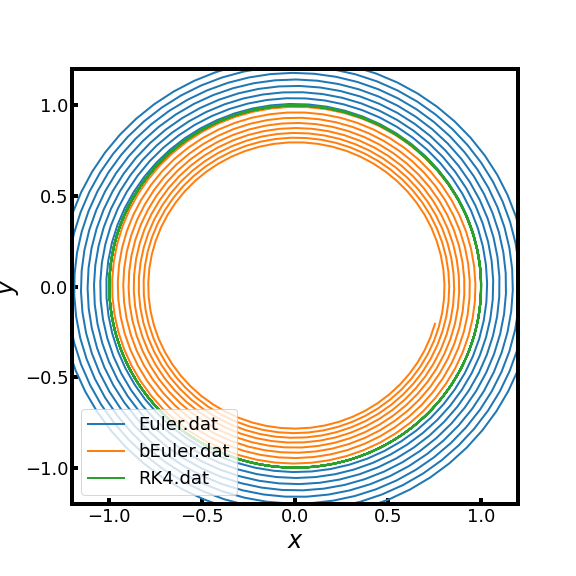

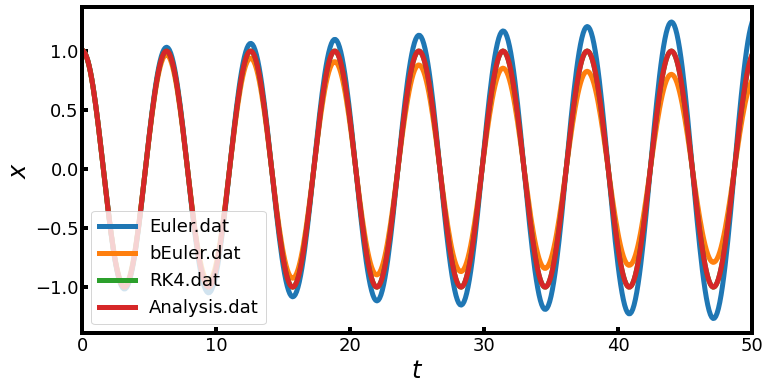

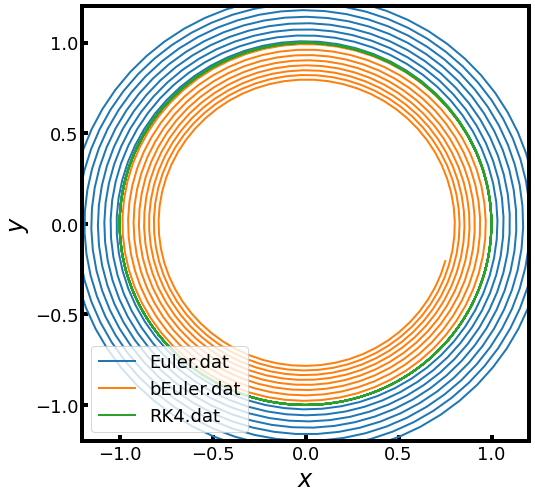

In [ ]:
# Preparation for the calcuation
import math
import numpy as np

# Preparation for the figures
import matplotlib.pyplot as plt
from IPython.display import HTML
from IPython.display import Image

#######################################
# Main 
#######################################
def main():
  global nmax, nskip, ndata
  global n, nout
  global dt
  global t, x, y
  global omega
  nmax = 5000 # maximum time step
  nskip = 10
  ndata = int(nmax/nskip)

  omega = 1.0
  dt = 1.0e-2

#######################################
  Initialize()
  for n in range(0,nmax):
    n = n + 1
    t = t + dt
    x = math.cos(omega*t)
    y = math.sin(omega*t)
    if n % nskip == 0 :
      tmseq[nout] = t 
      xsseq[nout] = x
      ysseq[nout] = y 
      nout = nout +1
  OutputSequence("Analysis.dat")

#######################################
  Initialize()
  for n in range(0,nmax):
    n = n + 1
    t = t + dt
    Euler()
    if n % nskip == 0 :
      tmseq[nout] = t 
      xsseq[nout] = x
      ysseq[nout] = y 
      nout = nout +1
  OutputSequence("Euler.dat")

#######################################
  Initialize()
  for n in range(0,nmax):
    n = n + 1
    t = t + dt
    bEuler()
    if n % nskip == 0 :
      tmseq[nout] = t 
      xsseq[nout] = x
      ysseq[nout] = y 
      nout = nout +1
  OutputSequence("bEuler.dat")
#######################################
  Initialize()
  for n in range(0,nmax):
    n = n + 1
    t = t + dt
    RK4()
    if n % nskip == 0 :
      tmseq[nout] = t 
      xsseq[nout] = x
      ysseq[nout] = y 
      nout = nout +1
  OutputSequence("RK4.dat")
#######################################

def Initialize():
  global ndata
  global tmseq, xsseq, ysseq
  tmseq = np.zeros(ndata)
  xsseq = np.zeros(ndata)
  ysseq = np.zeros(ndata)

  global t, x, y
  t = 0.0
  x = 1.0
  y = 0.0

  global n, nout
  n = 0
  nout = 0
#######################################
def RHS(x,y):
  dx = - y * omega
  dy =   x * omega
  return dx, dy

def jacobian(x,y):
      df1dx =  0.0
      df1dy = -omega 
      df2dx =  omega
      df2dy =  0.0
      return df1dx,df1dy,df2dx,df2dy

def invmtrix(a,b,c,d):
      det = a*d-b*c
      ia= d/det
      ib=-b/det
      ic=-c/det
      id= a/det
      return ia,ib,ic,id
#######################################
def Euler():
  global x
  global y
  dx, dy = RHS(x,y)
  x = x + dx*dt
  y = y + dy*dt

def bEuler():
  global x
  global y
  dx, dy = RHS(x,y)
  df1dx,df1dy,df2dx,df2dy = jacobian(x,y)
  a,b,c,d = invmtrix(1.0-dt*df1dx,-dt*df1dy,-dt*df2dx,1.0-dt*df2dy)
  xnew = a*x+b*y  
  ynew = c*x+d*y

  x=xnew
  y=ynew

def RK4():
  global x
  global y
  dx1, dy1 = RHS(x ,y)
  x1 = x + dx1*dt*0.5
  y1 = y + dy1*dt*0.5
  dx2, dy2 = RHS(x1,y1)
  x2 = x + dx2*dt*0.5
  y2 = y + dy2*dt*0.5
  dx3, dy3 = RHS(x2,y2)
  x3 = x + dx3*dt
  y3 = y + dy3*dt
  dx4, dy4 = RHS(x3,y3)

  x = x + (dx1+2.0*dx2+2.0*dx3+dx4)*dt/6.0
  y = y + (dy1+2.0*dy2+2.0*dy3+dy4)*dt/6.0
#######################################

def OutputSequence(filename):
  #output snapshots 
  global numout
  outf= open(filename,'w')
  num =tmseq.size
  for i in range(0,num):
    result = " {:.7e} {:.7e} {:.7e} \n".format(tmseq[i], xsseq[i], ysseq[i])
    outf.write(result)
  outf.close()

#######################################
def DrawTimeX():
  figA = plt.figure(figsize=(12,6))
  plt.rcParams['font.size'] = 18
  ax1 = figA.add_subplot(1,1,1)
  length = 6
  width = 4
  spines = 4
  ax1.spines["top"].set_linewidth(spines) 
  ax1.spines["left"].set_linewidth(spines)
  ax1.spines["bottom"].set_linewidth(spines)
  ax1.spines["right"].set_linewidth(spines)
  ax1.tick_params(direction="in", length=length, width=width)

  inuputlist = "Euler.dat", "bEuler.dat", "RK4.dat", "Analysis.dat"
  for input in inuputlist:
#    print(input)
    inputf= open(input, 'r')
    header= inputf.readline() # Read the fisrtline
    results = np.genfromtxt(input,skip_header=0,delimiter=' ') # Read numbers
    tmseq, xsseq, ysseq =  np.split(results,3,1)
    inputf.close()
    im1 = ax1.plot(tmseq,xsseq, label=input, linewidth=5)
    ax1.set_xlabel(r"$t$",fontsize=24) 
    ax1.set_ylabel(r"$x$",fontsize=24)
    ax1.set_xlim([0,50])

  locleg = "lower left"
  ax1.legend(loc=locleg) 
  figA.savefig('t-x.png')

def DrawXY():
  figA = plt.figure(figsize=(8,8))
  plt.rcParams['font.size'] = 18
  ax1 = figA.add_subplot(1,1,1)
  length = 6
  width = 4
  spines=4
  ax1.spines["top"].set_linewidth(spines) 
  ax1.spines["left"].set_linewidth(spines)
  ax1.spines["bottom"].set_linewidth(spines)
  ax1.spines["right"].set_linewidth(spines)
  ax1.tick_params(direction="in", length=length, width=width)

  inuputlist =  "Euler.dat", "bEuler.dat", "RK4.dat"
  for input in inuputlist:
#    print(input)
    inputf= open(input, 'r')
    header= inputf.readline() # Read the fisrtline
    results = np.genfromtxt(input,skip_header=0,delimiter=' ') # Read numbers
    tmseq, xsseq, ysseq =  np.split(results,3,1)
    inputf.close()
    im1 = ax1.plot(xsseq,ysseq, label=input, linewidth=2)
    ax1.set_xlabel(r"$x$",fontsize=24) 
    ax1.set_ylabel(r"$y$",fontsize=24)
    ax1.set_xlim([-1.2,1.2])
    ax1.set_ylim([-1.2,1.2])

  locleg = "lower left"
  ax1.legend(loc=locleg) 
  figA.savefig('x-y.png')


#######################################
# Excute Main (Do not delete!)
#######################################
if __name__ == "__main__":
  main()
  DrawTimeX()
  DrawXY()
Image(filename='t-x.png')
Image(filename='x-y.png')